# Titanic Survival Prediction                                                        
                                                                          Project by:- Love Fadia

# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
train_set =pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization and Cleaning

<AxesSubplot:title={'center':'Missing Values'}>

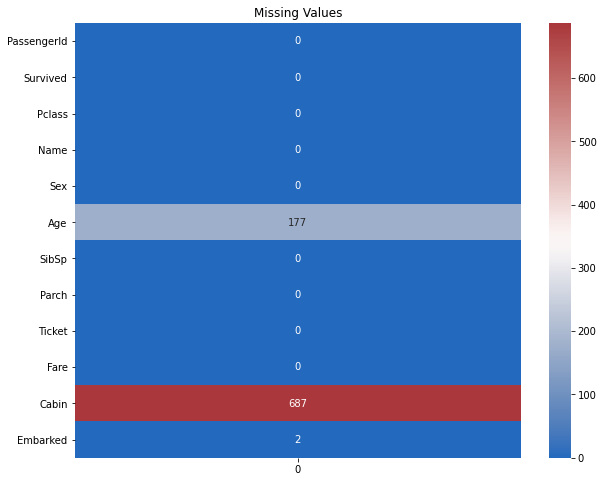

In [5]:
plt.figure(figsize=(10,8))
plt.title("Missing Values")
sns.heatmap(data= train_set.isna().sum().to_frame(),annot= True , fmt = "d",cmap="vlag")

### Cabin ,Age ,  Embarked have missing values

<AxesSubplot:>

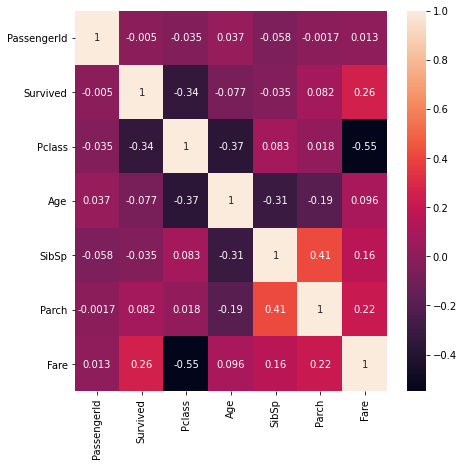

In [6]:
plt.figure(figsize=(7,7))
sns.heatmap(data= train_set.corr(),annot=True )

# Dropping Values 

In [7]:
train_set.drop("Name", axis=1, inplace=True)
train_set.drop("Ticket", axis=1, inplace=True)

In [8]:
test_set.drop("Name", axis=1, inplace=True)
test_set.drop("Ticket", axis=1, inplace=True)


In [9]:
train_set["Embarked"].fillna("S",inplace = True)
test_set["Embarked"].fillna("S",inplace = True)


In [10]:
train_set["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
train_set.drop("Cabin" ,axis=1, inplace=True)
test_set.drop("Cabin", axis=1, inplace=True)

In [12]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [13]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Filling  Missing values with mean

In [14]:
age_mean  = train_set["Age"].mean()
train_set["Age"].fillna(30,inplace=True)
test_set["Age"].fillna(30,inplace=True)


In [15]:
test_set["Fare"].fillna(36,inplace=True)

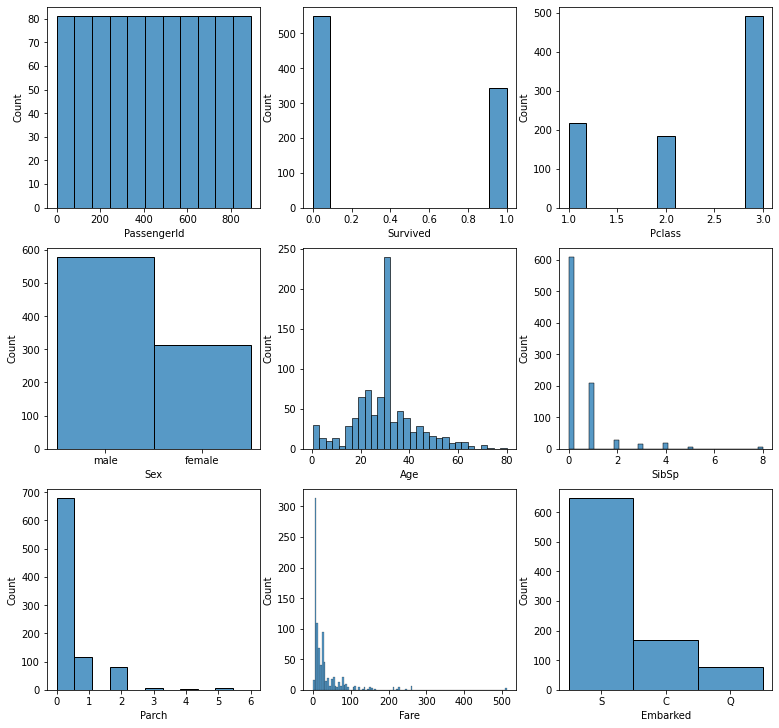

In [16]:
i=1
plt.figure(figsize = (13,17))
for col in train_set.columns:
    plt.subplot(4,3,i)
    sns.histplot(train_set[col])
    i+=1

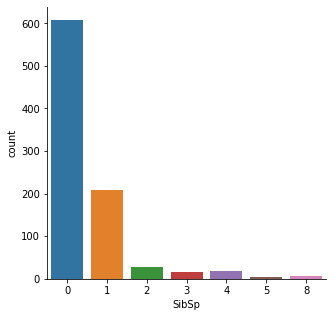

In [17]:
plt.figure(figsize=(5,5))

sns.countplot(data = train_set,x= "SibSp")
sns.despine()


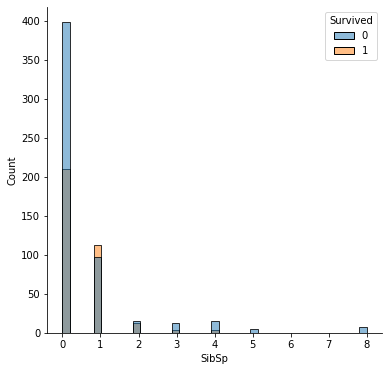

In [18]:
plt.figure(figsize = (6,6))

sns.histplot(data = train_set, x = "SibSp", hue="Survived" )
sns.despine()

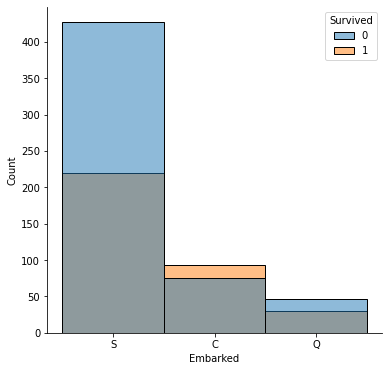

In [19]:
plt.figure(figsize = (6,6))

sns.histplot(data = train_set, x = "Embarked", hue="Survived" )
sns.despine()

# Dividing Categorical values and numerical values

In [20]:
a = (train_set.dtypes  =="object")
object_cols =list(a[a].index)
object_cols

['Sex', 'Embarked']

In [21]:
train_set = pd.get_dummies(data=train_set, columns=object_cols)
test_set = pd.get_dummies(data=test_set, columns=object_cols)


In [22]:
X = train_set.drop("Survived",axis=1).values
y = train_set["Survived"].values

# Train-crossvalidation splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid , y_train,y_valid =  train_test_split(X,y, test_size=0.15,random_state=42)

# Importing  and Train models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred  = lr_model.predict(X_valid)
lr_score = accuracy_score(y_valid,y_pred)
lr_score


c:\Users\Admin\Desktop\MLprojects\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8059701492537313

Text(0, 0.5, 'Error Rate')

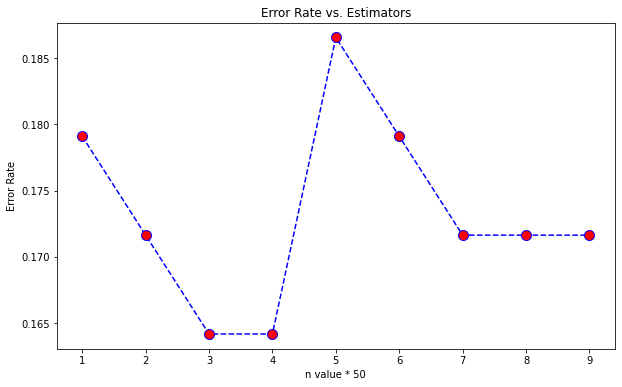

In [26]:
error_rate = []
estimator=[50,100,150,200,250,300,350,400,450]
for i in estimator:
	
	RFC=RandomForestClassifier(n_estimators=i)
	RFC.fit(X_train, y_train)
	pred_i = RFC.predict(X_valid)
	error_rate.append(np.mean(pred_i != y_valid))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 10), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. Estimators')
plt.xlabel('n value * 50')
plt.ylabel('Error Rate')

# Model Evaluation

In [36]:
rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train,y_train)
y_pred1 = rf_model.predict(X_valid)
rf_score =  accuracy_score(y_pred1,y_valid)
rf_score

0.8432835820895522

In [28]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred2 = xgb_model.predict(X_valid)
xgb_score =  accuracy_score(y_pred2,y_valid)
xgb_score

c:\Users\Admin\Desktop\MLprojects\ML\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7985074626865671

In [37]:
Acc_score = pd.DataFrame({"Model" : ["Logistic Regression","RandomForestClassifier","Xgbboost"], 
                     "Accuracy" : [lr_score,rf_score,xgb_score]})
Acc_score

,Model,Accuracy
0,Logistic Regression,0.805970
1,RandomForestClassifier,0.843284
2,Xgbboost,0.798507


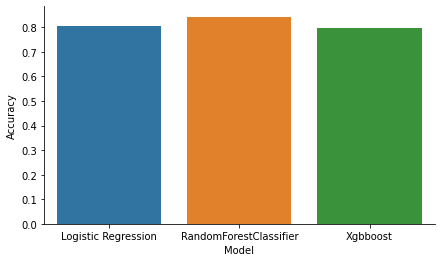

In [38]:
plt.figure(figsize=(7,4))
sns.barplot(x=Acc_score["Model"],y=Acc_score["Accuracy"])
sns.despine()

In [39]:
from joblib import dump , load
dump(rf_model, "TITANIC.joblib")

['TITANIC.joblib']

In [40]:

pred_test = rf_model.predict(test_set)
dd = pd.DataFrame(pred_test, columns=["Survived"])
dd.to_csv('submission.csv', index=False)

